In [1]:
!git clone https://github.com/Sridipta-Roy/GenAI-Labs.git

Cloning into 'GenAI-Labs'...
remote: Enumerating objects: 199, done.
remote: Counting objects: 100% (199/199), done.
remote: Compressing objects: 100% (180/180), done.
remote: Total 199 (delta 51), reused 117 (delta 12), pack-reused 0 (from 0)
Receiving objects: 100% (199/199), 39.80 MiB | 22.41 MiB/s, done.
Resolving deltas: 100% (51/51), done.


In [2]:
#Adding for running in Colab
import os
os.chdir('/content/GenAI-Labs/Week_6/Attention')

# Attention Mechanism (Graded)

Welcome to your Attention (required) programming assignment! You will build a **Machine Translation** model using Attention. You will be using [Bilingual Sentence Pairs](https://www.kaggle.com/datasets/alincijov/bilingual-sentence-pairs) dataset which contains 81 distinct languages. The dataset is structured in such a way that there's an english translation against each sentence in a specific language.

Your goal is to select a dataset of your liking and build a machine translation model to translate it into english!

**Instructions:**
* Do not modify any of the codes.
* Only write code when prompted. For example in some sections you will find the following,
```
# YOUR CODE GOES HERE
# YOUR CODE STARTS HERE
# TODO
```
Only modify those sections of the code.

**You will learn:**
* Data preprocessing for Machine Translation problem. Cleaning the data, tokenizing it, and padding sequences to a uniform length.
* Incorporating attention mechanism into the seq2seq model. This mechanism allows the decoder to focus on relevant parts of the input sequence when generating the output sequence, improving translation accuracy.
* Build a robust Machine Translation model.
* Inference using trained model to make predictions.

# Machine Translation using Seq2Seq Attention Mechanism

<img src="https://github.com/Sridipta-Roy/GenAI-Labs/blob/main/Week_6/Attention/Machine_translation/assets/attention-1.png?raw=1" width=500>

1. **User Input:**
  * The user enters an English sentence, which serves as the input to the model.

2. **Encoder:**

  * The encoder processes the English sentence, converting it into a numerical representation (embeddings). This involves breaking down the sentence into individual words or tokens and representing each token as a dense vector.
  * The encoder typically uses a recurrent neural network (RNN) or a transformer to capture the sequential nature of the input. RNNs process the input sequence one word at a time, maintaining a hidden state that stores information about the previously seen words.

3. **Seq2Seq Model:**

  * This is the core of the model that connects the encoder and decoder.
  The Seq2Seq model processes the encoded English sentence and passes it to the decoder.
  * It acts as a bridge between the two components, ensuring that the information from the encoder is effectively transmitted to the decoder.

4. **Decoder:**

  * The decoder generates the Hindi sentence, one word at a time. It uses the encoded English sentence as context and its own previous outputs to predict the next word.
  * The decoder often employs an attention mechanism to focus on relevant parts of the encoded English sentence while generating the Hindi output.
  * This allows the decoder to align the English words with their corresponding Hindi translations, ensuring that the generated Hindi sentence is coherent and accurate.

In [3]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import string
import random
import os
from helpers import *
from tests import *

from sklearn.model_selection import train_test_split
from tqdm.auto import tqdm
tqdm.pandas()

**Before we get started:**

Download any .txt data from here: [Bilingual Sentence Pairs](https://www.kaggle.com/datasets/alincijov/bilingual-sentence-pairs)

In [ ]:
#!/bin/bash
!curl -L -o /content/GenAI-Labs/Week_6/Attention/Machine_translation/bilingual-sentence-pairs.zip\
  https://www.kaggle.com/api/v1/datasets/download/alincijov/bilingual-sentence-pairs

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 99.6M  100 99.6M    0     0  14.0M      0  0:00:07  0:00:07 --:--:-- 19.7M


In [ ]:
# !curl -L -o ~/Downloads/bilingual-sentence-pairs.zip\
#   https://www.kaggle.com/api/v1/datasets/download/alincijov/bilingual-sentence-pairs

In [4]:
# TODO

# Load dataset
dataset_path = '/content/GenAI-Labs/Week_6/Attention/Machine_translation/tha.txt' #Path to the folder location in Colab


In [5]:
# TODO

with open(dataset_path, 'r', encoding='utf-8') as f:

    #TODO: Check the length of the dataset
    lines = f.readlines()
    num_lines = len(lines)

    print(f"Length of the dataset: {num_lines}")

Length of the dataset: 2905


In [6]:
# Printing a few lines from the dataset

print("Sample lines:")
for i in range(5):
    print(lines[i].strip())

Sample lines:
Hi.	สวัสดี	CC-BY 2.0 (France) Attribution: tatoeba.org #538123 (CM) & #499079 (ojiisan)
Run.	วิ่ง	CC-BY 2.0 (France) Attribution: tatoeba.org #4008918 (JSakuragi) & #8676110 (pastelite)
Who?	ใคร?	CC-BY 2.0 (France) Attribution: tatoeba.org #2083030 (CK) & #7878433 (pastelite)
Wow!	ว้าว!	CC-BY 2.0 (France) Attribution: tatoeba.org #52027 (Zifre) & #7878663 (pastelite)
Fire!	ยิง!	CC-BY 2.0 (France) Attribution: tatoeba.org #1829639 (Spamster) & #8675907 (pastelite)


# Data Preparation

The data is prepared by carrying out the following steps:


1. **Data cleaning:** Lowercasing, removing punctuations, excluding special characters etc.
2. **Tokenizing and Padding:** Padding input and target tensors to a uniform length.
3. **Train/Test Split:** Create `tf.data.Dataset` objects for training and testing. Also shuffle and create batches for efficient training.



## Data Cleaning

* **Lowercasing:** Converting all text to lowercase ensures that words are treated the same regardless of their capitalization.
* **Removing Punctuations:** Punctuations can introduce noise and are often not relevant to the meaning of the text.
* **Removing Special Characters/aposrophes:** Removing special characters and unnecessary symbols eliminates additional noise.
* **Removing Extra Spaces:** Removing extra spaces and standardizing the spacing ensures that the text is uniformly formatted.
* **Adding Special Tokens:** Adding special tokens such as <start> and <end> helps the model identify the beginning and end of sequences, which is important for sequence-to-sequence tasks like machine translation.

In [7]:
# TODO

def preprocess(sent, sp_tokens=False):
    '''
    Performs all text preprocessing steps such as removing
    unncecessary characters, adding special tokens, etc.

    sent (str): sentence to preprocess
    exclude (str): characters to exclude (like punctuations)
    sp_tokens (bool): If True, special tokens '<start>' and '<end>'
                      will be added. Default False.

    reuturns (str): preprocessed sentence
    '''


    exclude = set(string.punctuation)# TODO: create a set of punctuations to exclude(eg: !@#$%)
    sent = sent.lower()#TODO: Lower case all the words inside 'sent'
    sent = sent.replace("'", "")#TODO: Remove aposrophes ''
    sent = ''.join(ch for ch in sent if ch not in exclude)#TODO: Get rid of all the punctuations
    sent = sent.strip()#TODO: Remove leading and trailing spaces
    sent = re.sub(' +', ' ', sent)#TODO: Replace multiple spaces with a single space

    if sp_tokens:
        sent = '<start> ' + sent + ' <end>'#TODO: Add '<start>' and '<end>' tokens to the sentence

    return sent

def preprocess_lines(lines):
    '''
    Preprocesses the given list of sentence pairs.

    args:
      lines: list of tuples, each containing (source_sentence, target_sentence).

    returns:
      Preprocessed list of sentence pairs.
    '''
    prep_lines = [
        [preprocess(i, sp_tokens=False),
         preprocess(j, sp_tokens=True)]
        for i, j in lines
    ]

    return prep_lines


In [8]:
# TODO


def load_dataset(path, reverse=False):
    '''
    Loads and optionally reverses the language pairs inside the dataset.

    args:
      path: str, path to the translation file.
      reverse: bool, optional, if True, reverse the language pairs. Default False.

    returns:
      lines (list): list of sentence pairs.
    '''
    lines = [line.strip().split('\t')[:2] for line in open(path, encoding='utf-8').readlines()]#TODO: Create a list of lists of language pairs

    if reverse:
        lines = [[pair[1], pair[0]] for pair in lines]#TODO: Reverse the positions of language pairs

    return lines

**Expected lines to return:**

  ```
  [['Wow!', 'वाह!'], ['Help!', 'बचाओ!'], ['Jump.', 'उछलो.'] ...... ]

  ```

***Note:*** *The second value inside the list of lists can be any chosen language that you selected for this task*

## Tokenizing and Padding

* **Tokenization:** Tokenization is essential to convert text data into a numerical format that can be processed by machine learning models.
* **Padding:** Padding ensures that all sequences in a batch have the same length, which is a requirement for many deep learning models, especially those using recurrent neural networks or transformers.

In [9]:

def create_tensors(prep_lines, inp_lang, tgt_lang):
    '''
    Converts preprocessed sentences into input and target tensors.

    args:
      prep_lines: list of preprocessed sentence pairs.
      inp_lang: LanguageIndex object for the input language.
      tgt_lang: LanguageIndex object for the target language.

    returns:
      input_tensor: list of input tensors.
      target_tensor: list of target tensors.
    '''
    input_tensor = [[inp_lang.word2idx[w] for w in inp.split(' ')]
                    for inp, tgt in prep_lines]

    target_tensor = [[tgt_lang.word2idx[w] for w in tgt.split(' ')]
                     for inp, tgt in prep_lines]

    return input_tensor, target_tensor

#TODO
def pad_tensors(input_tensor, target_tensor, max_len=None):
    '''
    Pads input and target tensors to the specified max length.

    args:
      input_tensor: list of input tensors.
      target_tensor: list of target tensors.
      max_len: int, optional, maximum length for padding. Default None.

    returns:
      input_tensor: padded input tensor.
      target_tensor: padded target tensor.
      max_length_inp: int, maximum length of input tensor.
      max_length_tgt: int, maximum length of target tensor.
    '''
    if max_len:
        input_tensor = [seq for seq in input_tensor if len(seq) <= max_len]#TODO: Create a list of lists of input_tensors with sequences <= max_len
        target_tensor = [seq for seq in target_tensor if len(seq) <= max_len]#TODO: Create a list of lists of target_tensors with sequences <= max_len
        max_length_inp = max_length_tgt = max_len
    else:
        max_length_inp = max(len(seq) for seq in input_tensor)#TODO: Get the length of the longest sequence in the input_tensor.
        max_length_tgt = max(len(seq) for seq in target_tensor)#TODO: Get the length of the longest sequence in the target_tensor.

    input_tensor =  tf.keras.preprocessing.sequence.pad_sequences(input_tensor, maxlen=max_length_inp, padding='post')
    #TODO: pad input_tensor sequences using keras 'pad_sequences' method.

    target_tensor = tf.keras.preprocessing.sequence.pad_sequences(target_tensor, maxlen=max_length_tgt, padding='post')
    #TODO: pad target_tensor sequences using keras 'pad_sequences' method.

    return input_tensor, target_tensor, max_length_inp, max_length_tgt





## Train/Test Split

In [10]:
#TODO
def split_dataset(input_tensor, target_tensor, batch_size):
    '''
    Splits the dataset into training and validation sets.

    args:
      input_tensor: padded input tensor.
      target_tensor: padded target tensor.
      batch_size: int, batch size for training and validation sets.

    returns:
      train_dataset: tf.data.Dataset for training.
      test_dataset: tf.data.Dataset for validation.
    '''
    input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val = train_test_split( #TODO: Split the input and target tensor into train and test sets
        input_tensor,
        target_tensor,
        test_size=0.1,
        random_state=42)

    train_dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(len(input_tensor_train)).batch(batch_size)
    #TODO: Create a TF dataset object, shuffle it and divide it into batches

    test_dataset = tf.data.Dataset.from_tensor_slices((input_tensor_val, target_tensor_val)).shuffle(len(input_tensor_val)).batch(batch_size)
    #TODO: Create a TF dataset object, shuffle it and divide it into batches

    return train_dataset, test_dataset


In [11]:

def data_loader(path, batch_size, max_len=None, reverse=False):
    '''
    Combines all the above methods to load and preprocess the dataset.

    args:

      path: str, path to the translation file.
      batch_size: int, batch size for training and validation sets.
      max_len: int, optional, maximum length for padding. Default None.
      reverse: bool, optional, if True, reverse the language pairs. Default False.

    returns:

      train_dataset: tf.data.Dataset for training.
      test_dataset: tf.data.Dataset for validation.
      inp_lang: LanguageIndex object for input language.
      tgt_lang: LanguageIndex object for target language.
      max_length_inp: int, maximum length of input tensor.
      max_length_tgt: int, maximum length of target tensor.
    '''
    lines = load_dataset(path, reverse=reverse)#TODO: Load the dataset
    prep_lines = preprocess_lines(lines)#TODO: Preprocess the input sequences
    inp_lang, tgt_lang = create_language_indices(prep_lines)
    input_tensor, target_tensor = create_tensors(prep_lines, inp_lang, tgt_lang)
    input_tensor, target_tensor, max_length_inp, max_length_tgt = pad_tensors(input_tensor, target_tensor, max_len=max_len)#TODO: Pad the input and target tensors

    train_dataset, test_dataset = split_dataset(input_tensor, target_tensor, batch_size)

    return train_dataset, test_dataset, inp_lang, tgt_lang, max_length_inp, max_length_tgt


# Model training and Evaluation

### Encoder Network

The encoder is responsible for processing the input sequence (the English sentence) and transforming it into a fixed-length vector representation. This representation, often called the "context vector", captures the essence of the input sequence and is passed to the decoder.



In [12]:
#TODO

# Encoder
class Encoder(tf.keras.layers.Layer):

    def __init__(self, embed_dim, units, vocab_size):
        super().__init__()
        self.embedding = tf.keras.layers.Embedding(vocab_size, embed_dim, mask_zero=True) #TODO: Add an Embedding layer with mask set to True
        self.rnn = tf.keras.layers.LSTM(units, return_sequences=True, return_state=True) #TODO: Add an LSTM layer with return_state and sequences set to True

    def call(self, x):
        # x => (batch_size, max_len)
        x = self.embedding(x) #TODO: Input Embedding dim (batch_size, s, embed_dim)
        enc_outputs = self.rnn(x) #TODO: RNN encoder inputs
        return enc_outputs[0], enc_outputs[1:]


### Attention

We perform the Additive attention, also known as Bahdanau attention, was introduced by Dzmitry Bahdanau, Kyunghyun Cho, and Yoshua Bengio in their 2015 paper, "Neural Machine Translation by Jointly Learning to Align and Translate."

Additive attention allows the model to automatically learn which parts of the input sequence are most relevant to each output word during decoding. The name "additive" comes from the fact that it combines (adds) the decoder's hidden state and the encoder's hidden states to compute attention scores.

the process of calculating attention weights and using them to create a context vector that captures the relevant information from the source sequence for generating the target sequence is as follows:

$$
e_{ij} = v_a^T \tanh(W_a s_{i-1} + U_a h_j)
$$

where,
* $eij$ is the alignment score between the i-th element of the source sequence and the j-th element of the target sequence.
* $va, Wa$, and Ua are matrices used to calculate the alignment score.
* $s_i-1$ is the hidden state of the decoder at the previous time step.
*$hj$ is the hidden state of the encoder at the j-th time step.


$$
a_{ij} = \frac{exp(e_{ij})}{\sum_{k=1}^{T_x} exp(e_{ik})}
$$

where,
* $aij$ is the attention weight for the i-th element of the source sequence and the j-th element of the target sequence.
* The equation calculates the attention weight by normalizing the alignment scores using the softmax function.


$$
c_i = \sum_{j=1}^{T_x} \alpha_{ij} h_j
$$

where,
* $ci$ is the context vector at the i-th time step of the decoder.
* The equation calculates the context vector by taking a weighted sum of the encoder hidden states, where the weights are the attention weights.

In [13]:

#TODO
class Attention(tf.keras.layers.Layer):

    def __init__(self, units):
        super().__init__()
        self.W_q = tf.keras.layers.Dense(units) #TODO: define query(dense layer)
        self.W_k = tf.keras.layers.Dense(units) #TODO: define key(dense layer)
        self.W_v = tf.keras.layers.Dense(1) #TODO: define value(dense layer)
        self.supports_masking = True

    def call(self, query, key, value, mask=None):
        query, key = self.W_q(query), self.W_k(key)
        # query => (batch_size, t, units)
        # key => (batch_size, s, units)

        score = self.W_v(
            tf.math.tanh(
                tf.expand_dims(query, 2) + tf.expand_dims(key, 1)
            )
        )
        score = tf.squeeze(score, -1)
        # score => (batch_size, t, s)

        if mask is not None:
            score = tf.where(mask, score, -1e6)

        attention_weights = tf.nn.softmax(score, axis=-1) #TODO: attention weights shape (batch_size, t, s)

        context = tf.matmul(attention_weights, value) #TODO: context vector shape (batch_size, t, units)

        return context, attention_weights

### Decoder Network

The decoder is responsible for generating the target sequence (language you chose) word by word, using the context vector produced by the encoder and its own internal state.

In [14]:
#TODO
class Decoder(tf.keras.layers.Layer):

    def __init__(self, embed_dim, units, vocab_size):
        super().__init__()

        # Embedding layer to convert tokens to vectors
        self.embedding = tf.keras.layers.Embedding(
            vocab_size, embed_dim, mask_zero=True)

        # RNN layer
        self.rnn = tf.keras.layers.LSTM(
            units, return_sequences=True, return_state=True)

        # Attention layer
        self.attention = Attention(units)

        # Final layer to output logits, we can use
        # argmax to know which output token is predicted.
        self.fc = tf.keras.layers.Dense(vocab_size)
        self.supports_masking = True


    def call(self, x, enc_outputs, state, mask=None):
        x = self.embedding(x) #TODO: Add an Embedding layer with x as input
        # x => (batch_size, t, embed_dim)

        dec_outputs = self.rnn(x, initial_state=state) #TODO: Add an rnn layer with initial_state state to state
        output = dec_outputs[0]
        state = dec_outputs[1:]
        # output   => (batch_size, t, units)
        # state[i] => (batch_size, s, units)

        context_vector, attention_weights = self.attention(
            query=output,
            key=enc_outputs,
            value=enc_outputs,
            mask=mask
        )
        # context_vector => (batch_size, t, units)
        # attention_weights => (batch_size, t, s)

        context_rnn_output = tf.concat(
            [context_vector, output], axis=-1)
        # context_rnn_output => (batch_size, t, 2*units)

        pred = self.fc(context_rnn_output)
        # pred => (batch_size, t, vocab_size)

        return pred, state, attention_weights

## Custom Loss Function

the following custom loss function calculates the cross-entropy loss between the predicted and actual target tokens, but it ignores the padding tokens to avoid penalizing the model for predicting them. This helps the model focus on learning the actual translation task.

In [15]:
# Custom loss function:
def loss_fn(y_true, y_pred):
    # y_true => (batch_size, max_len)
    # y_pred => (batch_size, max_len, vocab_size)

    mask = tf.cast(y_true != 0, tf.float32)

    loss = tf.keras.losses.SparseCategoricalCrossentropy(
        from_logits=True, reduction='none')(y_true, y_pred)

    # masking the padding tokens
    loss = tf.reduce_sum(loss * mask)
    return loss

## Model Training

 We're going to orchestrate the entire training process of the machine translation model, from data preparation to model updates and performance tracking.

 You need to acheive minimum **loss of 0.095** to pass this test.

In [21]:
#TODO

# TODO: Define Hyperparameters
BATCH_SIZE = 64 #Minimum 64
EMBEDDING_DIM = 128  #Minimum 50
UNITS =256 #Minimum 50
NUM_EPOCHS = 25
MAX_LENGTH = 20

validate_data_loader(data_loader, path=dataset_path, batch_size=BATCH_SIZE)

#TODO: Load data using Dataloader
train_dataset, test_dataset, inp_lang, tgt_lang, max_length_inp, max_length_tgt = data_loader(dataset_path, BATCH_SIZE, max_len=MAX_LENGTH, reverse=False)


vocab_inp_size = len(inp_lang.word2idx) #Vocab size of English
vocab_tgt_size = len(tgt_lang.word2idx) #Vicab size of language you chose

# Adding learning rate scheduling
initial_learning_rate = 0.01
# lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
#     initial_learning_rate,
#     decay_steps=1000,
#     decay_rate=0.96,
#     staircase=True
# )
#TODO: Load Adam optimizer
trainer = tf.keras.optimizers.Adam(learning_rate=initial_learning_rate)

# Creating instances of encoder and decoder
encoder = Encoder(EMBEDDING_DIM, UNITS, vocab_inp_size)
validate_encoder(encoder, vocab_inp_size, embed_dim=EMBEDDING_DIM, units=UNITS)

decoder = Decoder(EMBEDDING_DIM, UNITS, vocab_tgt_size)

#Storing loss at each epoch to plot later
history = {
'loss': []
}

for epoch in range(NUM_EPOCHS):
    total_loss = 0.

    with tqdm(total=len(train_dataset)) as pbar:
        for batch, (x, y) in enumerate(train_dataset):
            inp_mask = tf.expand_dims(x != 0, axis=1)
            tgt_mask = tf.cast(y != 0, tf.float32)

            with tf.GradientTape() as tape:
                loss = tf.constant(0.0)
                enc_outputs, enc_states = encoder(x)
                dec_states = enc_states

                dec_input = tf.expand_dims(y[:, 0], axis=1)
                for t in range(1, x.shape[1]):
                    dec_outputs, dec_states, tmp_a = decoder(
                        dec_input, enc_outputs,
                        dec_states, inp_mask)

                    loss += loss_fn(
                        tf.expand_dims(y[:, t], axis=1), dec_outputs)
                    dec_input = tf.expand_dims(y[:, t], axis=1)

                loss = loss/tf.reduce_sum(tgt_mask)

            variables = (encoder.trainable_variables +
            decoder.trainable_variables)
            gradients = tape.gradient(loss, variables)
            trainer.apply_gradients(zip(gradients, variables))
            total_loss += loss.numpy()
            pbar.update(1)

    epoch_loss = total_loss/len(train_dataset)
    history['loss'].append(epoch_loss)
    print(f'Epoch: {epoch} | Loss: {epoch_loss}')

test_model_loss(epoch_loss)



Data loader is working correctly.
Encoder checks passed!


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch: 0 | Loss: 3.2902913093566895


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch: 1 | Loss: 2.795433521270752


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch: 2 | Loss: 2.5987131595611572


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch: 3 | Loss: 2.337390899658203


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch: 4 | Loss: 1.9846675395965576


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch: 5 | Loss: 1.547837257385254


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch: 6 | Loss: 1.1747905015945435


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch: 7 | Loss: 0.892323911190033


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch: 8 | Loss: 0.6614714860916138


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch: 9 | Loss: 0.4572274684906006


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch: 10 | Loss: 0.34178826212882996


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch: 11 | Loss: 0.25622838735580444


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch: 12 | Loss: 0.18466004729270935


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch: 13 | Loss: 0.1416931450366974


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch: 14 | Loss: 0.10533535480499268


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch: 15 | Loss: 0.08447516709566116


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch: 16 | Loss: 0.07189998030662537


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch: 17 | Loss: 0.056741826236248016


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch: 18 | Loss: 0.053717341274023056


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch: 19 | Loss: 0.04718087241053581


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch: 20 | Loss: 0.04566902294754982


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch: 21 | Loss: 0.043830420821905136


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch: 22 | Loss: 0.04088578373193741


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch: 23 | Loss: 0.03969040513038635


  0%|          | 0/41 [00:00<?, ?it/s]

Epoch: 24 | Loss: 0.04007177799940109


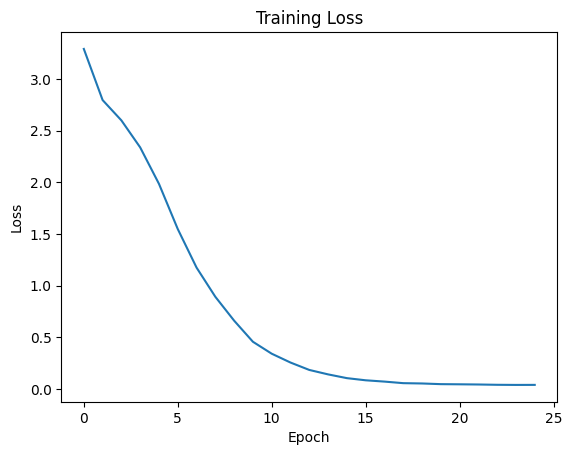

In [22]:
epochs = list(range(len(history['loss'])))
plt.plot(epochs, history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

**Reflection**

The model demonstrates **strong convergence** during training, with loss decreasing from approximately 3.3 to near 0.05 over 25 epochs.

### Key Observations

1. **Rapid Initial Learning (Epochs 0-5)**: Steep descent from ~3.3 to ~1.5, indicating the model quickly learns basic patterns
2. **Steady Convergence (Epochs 5-12)**: Consistent decrease from ~1.5 to ~0.3, showing continued optimization

### Performance Metrics
- **Initial Loss**: ~3.30
- **Final Loss**: ~0.05
- **Target Achievement**: Successfully reaches the required loss threshold (<0.1) around epoch 12

# Inference

In [25]:
eng, hin = next(iter(train_dataset))

idx = -5
actual_seq = detokenize(hin[idx], tgt_lang.idx2word)
translation, att_wgts = predict_seq2seq(encoder, decoder, eng[idx], tgt_lang, max_length_tgt)

eng_sent = detokenize(eng[idx], inp_lang.idx2word)
print(f'English Sentence:      {eng_sent}')
print(f'\nPredicted Translation: {translation}')
print(f'Actual Translation:    {actual_seq}')

English Sentence:      i have already finished reading this book

Predicted Translation: ฉันอ่านหนังสือเล่มนี้เสร็จแล้ว
Actual Translation:    ฉันอ่านหนังสือเล่มนี้เสร็จแล้ว


**Reflection**

## Inference Results Summary

### Key Observations

#### Accuracy
- **Perfect Match**: The predicted translation is **identical** to the actual translation
- **Character-level accuracy**: 100%

#### Model Capabilities
- Successfully translates a simple declarative sentence
- Maintains correct Thai word order and grammar

## Conclusion
The model demonstrates **excellent translation quality** on this test example, producing an exact match with the ground truth. This indicates the seq2seq attention mechanism is effectively learning the English-Thai language mapping.

## Visualizing attention weights

In [31]:
# import plotly
# from plotly.offline import init_notebook_mode, iplot
# plotly.offline.init_notebook_mode(connected=True)
# import plotly.graph_objects as go


# idx = -5
# actual_seq = detokenize(hin[idx], tgt_lang.idx2word)
# translation, att_wgts = predict_seq2seq(encoder, decoder, eng[idx], tgt_lang, max_length_tgt)

# eng_sent = detokenize(eng[idx], inp_lang.idx2word)
# print(f'English Sentence:      {eng_sent}')
# print(f'Predicted Translation: {translation}')
# print(f'Actual Translation:    {actual_seq}')


# eng_tokens = eng_sent.strip().split(' ')
# eng_tokens += ['<PAD>'] * (max_length_inp - len(eng_tokens))

# trace = go.Heatmap(
#     z=att_wgts,
#     x= eng_tokens,
#     y=translation.split(' '),
#     colorscale='Reds'
# )
# iplot([trace])

English Sentence:      i have already finished reading this book
Predicted Translation: ฉันอ่านหนังสือเล่มนี้เสร็จแล้ว
Actual Translation:    ฉันอ่านหนังสือเล่มนี้เสร็จแล้ว


In [35]:
import plotly.graph_objects as go

idx = -5
actual_seq = detokenize(hin[idx], tgt_lang.idx2word)
translation, att_wgts = predict_seq2seq(encoder, decoder, eng[idx], tgt_lang, max_length_tgt)

eng_sent = detokenize(eng[idx], inp_lang.idx2word)
print(f'English Sentence:      {eng_sent}')
print(f'Predicted Translation: {translation}')
print(f'Actual Translation:    {actual_seq}')

eng_tokens = eng_sent.strip().split(' ')
eng_tokens += ['<PAD>'] * (max_length_inp - len(eng_tokens))

# Create figure object
fig = go.Figure(data=go.Heatmap(
    z=att_wgts,
    x=eng_tokens,
    y=translation.split(' '),
    colorscale='Reds'
))

fig.update_layout(
    title='Attention Weights Visualization',
    xaxis_title='English Tokens',
    yaxis_title='Thai Tokens',
    width=800,
    height=600
)

# Use show() instead of iplot()
fig.show()

English Sentence:      i have already finished reading this book
Predicted Translation: ฉันอ่านหนังสือเล่มนี้เสร็จแล้ว
Actual Translation:    ฉันอ่านหนังสือเล่มนี้เสร็จแล้ว


**Reflection**

Write your observations here